In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob
interval = ["point125","point25","point5","point75"]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/debug/"+interval[2]+"/"
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_SARA_1567655628gra745_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_SARA_1567753274gra104_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_SARA_1567753274gra643_file.csv
PLA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567655657gra745_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567693783gra998_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567693784gra1001_file.csv
Random: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_Random_1567655619gra744_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_Random_1567655648gra744_file.csv


## Old

In [5]:
all_combined_data = dict()
end_time = 10
end_step = end_time * 60 * 2

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))

    mode_combined_data = pd.DataFrame()
    for i in range(len(all_data_files[mode])):
        mode_combined_data["run"+str(i)] = mode_data[i].loc[mode_data[i]["Step"]<=end_step]["Value"]
    mode_combined_data["avg"] = mode_combined_data.mean(axis=1)
    mode_combined_data['std'] = mode_combined_data.std(axis=1)
#     mode_combined_data.head()
    all_combined_data[mode] = mode_combined_data

KeyError: 'Step'

In [6]:
all_combined_data['SARA']

KeyError: 'SARA'

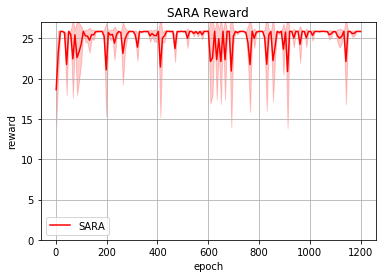

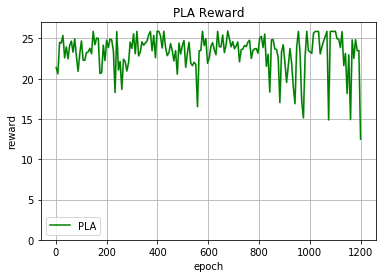

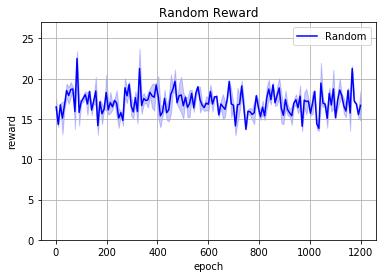

In [28]:
# Plot mean and std
names = ["SARA","PLA","Random"]
colors = ['r','g','b']

for name, c in zip(names, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[name]
    length = data.shape[0]
    plt.fill_between(np.linspace(1,1200,length), data['avg'] - data['std'],
                 data['avg'] + data['std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1200,length), data['avg'], '-', color=c,
         label=name)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} Reward'.format(name))
    plt.xlabel("epoch")
    plt.ylabel("reward")


## New

### 1. rollout/return

In [101]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[0]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/debug/"+itv+"/"
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point125\run_SARA_1567654217gra120_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point125\run_SARA_1567654221gra97_file.csv
PLA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point125\run_PLA_1567654217gra702_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point125\run_PLA_1567654218gra29_file.csv
Random: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point125\run_Random_1567654213gra632_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point125\run_Random_1567654215gra635_file.csv


In [102]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [103]:
all_combined_data['SARA']

,rollout/return_run0,rollout/return_run1,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_run1,rollout/Q_mean_avg,rollout/Q_mean_std
0,1.098501,3.362848,2.230674,1.132174,-0.000648,0.000571,-0.000038,0.000609
1,8.841478,8.885210,8.863344,0.021866,0.011958,0.072788,0.042373,0.030415
2,9.250288,10.527712,9.889000,0.638712,0.091439,0.199597,0.145518,0.054079
3,4.512748,3.266068,3.889408,0.623340,0.151472,0.238237,0.194855,0.043383
4,4.051555,3.754338,3.902946,0.148609,0.224331,0.284869,0.254600,0.030269
5,8.157282,13.126198,10.641740,2.484458,0.303139,0.393243,0.348191,0.045052
6,13.797249,0.994287,7.395768,6.401481,0.430663,0.436329,0.433496,0.002833
7,12.053764,9.448697,10.751231,1.302534,0.531070,0.516056,0.523563,0.007507
8,3.705851,10.845081,7.275466,3.569615,0.620899,0.602878,0.611889,0.009011
9,0.534088,8.504922,4.519505,3.985417,0.693004,0.686202,0.689603,0.003401


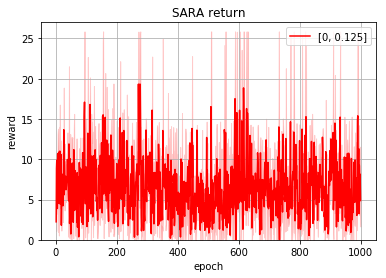

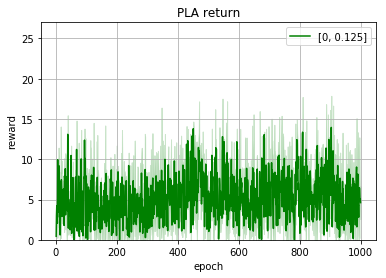

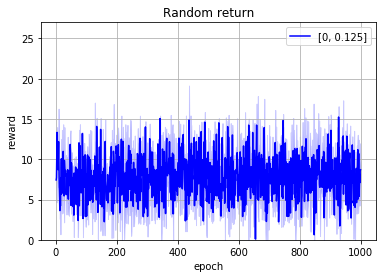

In [104]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig('./plots_for_thesis/debug/{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')


### 2.rollout/return

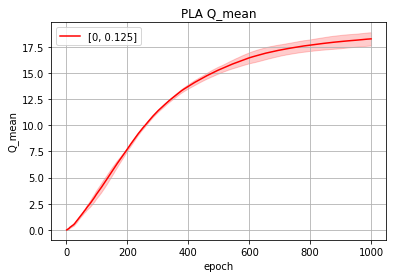

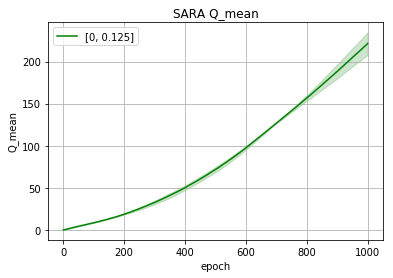

In [105]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    